In [14]:
# LEGO Investment Strategy Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from both sheets
lego_2018 = pd.read_excel('LEGO Analytics Case Data.xlsx', sheet_name='2018 Data')
lego_2019 = pd.read_excel('LEGO Analytics Case Data.xlsx', sheet_name='2019 Data')

# Add 'Year' column
lego_2018['Year'] = 2018
lego_2019['Year'] = 2019

# Combine the two datasets into one DataFrame
lego_data = pd.concat([lego_2018, lego_2019], ignore_index=True)

# View data
print(lego_data.head())
print(lego_data.info())
print(lego_data.tail())

   Set #                         Name           Theme           Subtheme  \
0  10260               Downtown Diner  Creator Expert  Modular Buildings   
1  10261               Roller Coaster  Creator Expert         Fairground   
2  10262  James Bond Aston Martin DB5  Creator Expert           Vehicles   
3  10263  Winter Village Fire Station  Creator Expert     Winter Village   
4  10268          Vestas Wind Turbine  Creator Expert             Vestas   

  Release Month (US)  Piece Count  # of Minifigures  Length (in.)  \
0            January         2480                 6          22.8   
1               June         4124                11          22.9   
2             August         1290                 0          18.9   
3            October         1166                 8          18.8   
4           November          826                 3          14.8   

   Width (in.)  Height (in.)  Weight (lb.)  US Retail Price ($)  Year  
0         14.8           3.9          6.55              

In [39]:
# Calculating the price per piece 
lego_data['price_per_piece'] = lego_data['US Retail Price ($)'] / lego_data['Piece Count']
print(lego_data.head())

   Set #                         Name           Theme           Subtheme  \
0  10260               Downtown Diner  Creator Expert  Modular Buildings   
1  10261               Roller Coaster  Creator Expert         Fairground   
2  10262  James Bond Aston Martin DB5  Creator Expert           Vehicles   
3  10263  Winter Village Fire Station  Creator Expert     Winter Village   
4  10268          Vestas Wind Turbine  Creator Expert             Vestas   

  Release Month (US)  Piece Count  # of Minifigures  Length (in.)  \
0            January         2480                 6          22.8   
1               June         4124                11          22.9   
2             August         1290                 0          18.9   
3            October         1166                 8          18.8   
4           November          826                 3          14.8   

   Width (in.)  Height (in.)  Weight (lb.)  US Retail Price ($)  Year  \
0         14.8           3.9          6.55             

In [37]:
# Filter for selected themes and selected subthemes
selected_themes = ['Architecture', 'City', 'Creator', 'Creator Expert', 'DC Super Heroes', 'Disney',
                   'Friends', 'Harry Potter', 'Hidden Side', 'Ideas', 'Jurassic World', 'LEGO Movie 2',
                   'Marvel Super Heroes', 'Minecraft', 'Ninjago', 'Speed Champions', 'Star Wars', 'Technic']
selected_subthemes = ['Brickheadz', 'Juniors']

lego_data_filtered = lego_data[
    (lego_data['Theme'].isin(selected_themes)) |
    (lego_data['Subtheme'].isin(selected_subthemes))
]

In [43]:
# Summary statistics by Theme (Filtered)
theme_summary = lego_data_filtered.groupby('Theme').agg(
    set_count=('Set #', 'count'),
    avg_piece_count=('Piece Count', 'mean'),
    median_piece_count=('Piece Count', 'median'),
    min_piece_count=('Piece Count', 'min'),
    max_piece_count=('Piece Count', 'max'),
    std_piece_count=('Piece Count', 'std'),
    avg_minifigures=('# of Minifigures', 'mean'),
    median_minifigures=('# of Minifigures', 'median'),
    min_minifigures=('# of Minifigures', 'min'),
    max_minifigures=('# of Minifigures', 'max'),
    std_minifigures=('# of Minifigures', 'std'),
    avg_price=('US Retail Price ($)', 'mean'),
    median_price=('US Retail Price ($)', 'median'),
    min_price=('US Retail Price ($)', 'min'),
    max_price=('US Retail Price ($)', 'max'),
    std_price=('US Retail Price ($)', 'std'),
    avg_price_per_piece=('price_per_piece', 'mean'),
    median_price_per_piece=('price_per_piece', 'median'),
    min_price_per_piece=('price_per_piece', 'min'),
    max_price_per_piece=('price_per_piece', 'max'),
    std_price_per_piece=('price_per_piece', 'std')
).reset_index()
print (theme_summary)

                         Theme  set_count  avg_piece_count  \
0                 Architecture          8       939.000000   
1           Back to the Future          1       240.000000   
2                         City         66       339.969697   
3                      Creator         26       353.884615   
4               Creator Expert         10      1751.300000   
5              DC Super Heroes         25       365.120000   
6                       Disney         30       305.600000   
7                      Friends         63       305.333333   
8                 Ghostbusters          1       228.000000   
9                 Harry Potter         20       693.000000   
10                 Hidden Side          8       585.875000   
11                       Ideas          9      1209.666667   
12               Incredibles 2          4       145.500000   
13              Jurassic World         17       531.588235   
14                LEGO Movie 2         30       502.500000   
15      

In [45]:
# SummaryTheme Analysis:
# Analyzing LEGO sets from 2018 and 2019 across selected investment-relevant themes reveals key trends.
# Star Wars, City, and Friends had the highest number of sets released, indicating strong brand expansion.
# Creator Expert and Technic sets displayed the highest average piece counts, highlighting their appeal 
# to serious builders and collectors. Themes like Architecture and Creator offered the best value based 
# on lower average price per piece, suggesting better long-term investment potential. In contrast, 
# franchise-heavy themes like Jurassic World and LEGO Movie 2 had higher price per piece, reflecting 
# premium licensing costs. Overall, themes with larger, more complex sets and consistent fan bases 
# show stronger prospects for future price appreciation, aligning with Michael’s strategy.


In [49]:
# Summary statistics by Subtheme (Filtered)
subtheme_summary = lego_data_filtered.groupby('Subtheme').agg(
    set_count=('Set #', 'count'),
    avg_piece_count=('Piece Count', 'mean'),
    median_piece_count=('Piece Count', 'median'),
    min_piece_count=('Piece Count', 'min'),
    max_piece_count=('Piece Count', 'max'),
    std_piece_count=('Piece Count', 'std'),
    avg_minifigures=('# of Minifigures', 'mean'),
    median_minifigures=('# of Minifigures', 'median'),
    min_minifigures=('# of Minifigures', 'min'),
    max_minifigures=('# of Minifigures', 'max'),
    std_minifigures=('# of Minifigures', 'std'),
    avg_price=('US Retail Price ($)', 'mean'),
    median_price=('US Retail Price ($)', 'median'),
    min_price=('US Retail Price ($)', 'min'),
    max_price=('US Retail Price ($)', 'max'),
    std_price=('US Retail Price ($)', 'std'),
    avg_price_per_piece=('price_per_piece', 'mean'),
    median_price_per_piece=('price_per_piece', 'median'),
    min_price_per_piece=('price_per_piece', 'min'),
    max_price_per_piece=('price_per_piece', 'max'),
    std_price_per_piece=('price_per_piece', 'std')
).reset_index()
print (subtheme_summary)


                     Subtheme  set_count  avg_piece_count  median_piece_count  \
0                      Arctic          7       344.571429               277.0   
1                    Avengers         12       564.083333               470.0   
2                      Batman         10       666.900000               331.5   
3                     BigFigs          3       153.666667               159.0   
4               Black Panther          2       293.500000               293.5   
5                  Brickheadz         54       174.648148               146.0   
6           Buildable Figures          5       123.600000               104.0   
7              Desk Accessory          1        91.000000                91.0   
8                  Fairground          1      4124.000000              4124.0   
9                        Fire          7       357.714286               327.0   
10                    Juniors         39       127.025641               116.0   
11             Justice Leagu

In [51]:
# Summary - Subtheme Analysis:
# The Subtheme analysis of LEGO sets from 2018 and 2019 reveals important investment insights.
# Subthemes such as Brickheadz and Juniors had the highest number of sets (54 and 39 sets respectively), 
# although they featured smaller builds with lower average piece counts (around 174 and 127 pieces).
# High-piece-count subthemes like Fairground, Ultimate Collector Series, and Modular Buildings 
# demonstrated exceptional set complexity, with average piece counts exceeding 2500 pieces.
# Subthemes like Master Builder Series and LEGO Ninjago Movie stood out with very high minifigure counts, 
# enhancing their potential collector appeal.
# In terms of pricing, Brickheadz sets offered relatively low average retail prices (~$13), 
# whereas subthemes like Fairground and Master Builder Series commanded premium prices ($379–$349).
# Price per piece was most attractive in larger builds like Modular Buildings and LEGO Ninjago Movie 
# (around 6–7 cents), suggesting strong value for investors.
# Overall, larger, detailed subthemes with strong brand identity and higher minifigure counts 
# are likely to offer better long-term appreciation potential.


In [55]:
# Summary statistics by Theme and Subtheme (Filtered)
theme_subtheme_summary = lego_data_filtered.groupby(['Theme', 'Subtheme']).agg(
    set_count=('Set #', 'count'),
    avg_piece_count=('Piece Count', 'mean'),
    median_piece_count=('Piece Count', 'median'),
    min_piece_count=('Piece Count', 'min'),
    max_piece_count=('Piece Count', 'max'),
    std_piece_count=('Piece Count', 'std'),
    avg_minifigures=('# of Minifigures', 'mean'),
    median_minifigures=('# of Minifigures', 'median'),
    min_minifigures=('# of Minifigures', 'min'),
    max_minifigures=('# of Minifigures', 'max'),
    std_minifigures=('# of Minifigures', 'std'),
    avg_price=('US Retail Price ($)', 'mean'),
    median_price=('US Retail Price ($)', 'median'),
    min_price=('US Retail Price ($)', 'min'),
    max_price=('US Retail Price ($)', 'max'),
    std_price=('US Retail Price ($)', 'std'),
    avg_price_per_piece=('price_per_piece', 'mean'),
    median_price_per_piece=('price_per_piece', 'median'),
    min_price_per_piece=('price_per_piece', 'min'),
    max_price_per_piece=('price_per_piece', 'max'),
    std_price_per_piece=('price_per_piece', 'std')
).reset_index()
print(theme_subtheme_summary)


                         Theme                   Subtheme  set_count  \
0           Back to the Future                 Brickheadz          1   
1                         City                     Arctic          7   
2                         City                       Fire          7   
3                         City                    Juniors          5   
4                         City                     Mining          4   
5                         City            Mountain Police          7   
6                         City                 Sky Police          6   
7                         City                      Space          7   
8                         City                     Trains          2   
9               Creator Expert                 Fairground          1   
10              Creator Expert          Modular Buildings          2   
11              Creator Expert                      Space          1   
12              Creator Expert                   Vehicles       

In [57]:
# Summary - Theme + Subtheme Analysis:
# The Theme and Subtheme analysis of LEGO sets from 2018 and 2019 reveals critical patterns for investment decisions.
# Subthemes like Brickheadz and Juniors appeared widely across multiple major themes, contributing significantly 
# to total set counts but offering smaller builds with lower average piece counts (~120–180 pieces).
# High-end subthemes such as Modular Buildings, Ultimate Collector Series, Fairground, and Master Builder Series 
# stood out for their extremely large builds (average 2500–4000+ pieces) and premium pricing, aligning with strong collector interest.
# Sets under these premium subthemes also demonstrated lower price-per-piece ratios (~6–9 cents), suggesting excellent value 
# compared to smaller subthemes, which often had higher ratios (~14–20 cents).
# Subthemes tied to strong licenses (Star Wars, Harry Potter, Marvel Super Heroes) showed wide variability in set complexity 
# and pricing, but generally commanded higher average minifigure counts, enhancing collector appeal.
# Overall, larger, detailed subthemes within major themes, particularly those tied to global franchises, 
# offer the strongest potential for long-term appreciation.


In [61]:
# Summary statistics by Theme, Subtheme, and Price Per Piece (Filtered)
theme_subtheme_price_summary = lego_data_filtered.groupby(['Theme', 'Subtheme']).agg(
    set_count=('Set #', 'count'),
    avg_price_per_piece=('price_per_piece', 'mean'),
    median_price_per_piece=('price_per_piece', 'median'),
    min_price_per_piece=('price_per_piece', 'min'),
    max_price_per_piece=('price_per_piece', 'max'),
    std_price_per_piece=('price_per_piece', 'std')
).reset_index()
print(theme_subtheme_price_summary)

                         Theme                   Subtheme  set_count  \
0           Back to the Future                 Brickheadz          1   
1                         City                     Arctic          7   
2                         City                       Fire          7   
3                         City                    Juniors          5   
4                         City                     Mining          4   
5                         City            Mountain Police          7   
6                         City                 Sky Police          6   
7                         City                      Space          7   
8                         City                     Trains          2   
9               Creator Expert                 Fairground          1   
10              Creator Expert          Modular Buildings          2   
11              Creator Expert                      Space          1   
12              Creator Expert                   Vehicles       

In [63]:
# Summary - Price Per Piece Analysis
# The analysis of LEGO sets across themes and subthemes based on price per piece highlights important investment patterns.
# Subthemes associated with large and complex builds, such as Modular Buildings, Fairground, and Ultimate Collector Series, 
# consistently demonstrated the lowest average price per piece (around 6–9 cents), offering strong intrinsic value to investors.
# In contrast, smaller or promotional subthemes like Juniors, Microfighters, and certain Brickheadz editions had higher 
# average price per piece values, often exceeding 15–20 cents, reflecting their compact nature and marketing-driven pricing.
# Among licensed subthemes, sets tied to franchises such as Star Wars and Marvel Super Heroes showed moderate price per piece ratios, 
# typically between 8–12 cents, balancing brand premium with piece count.
# High standard deviations in price per piece were observed in themes like Batman and Star Wars Brickheadz, indicating 
# greater variability in value across individual sets.
# Overall, subthemes offering larger builds at lower price-per-piece ratios, particularly under strong brands like Creator Expert 
# and Star Wars, present the most promising opportunities for future value appreciation.


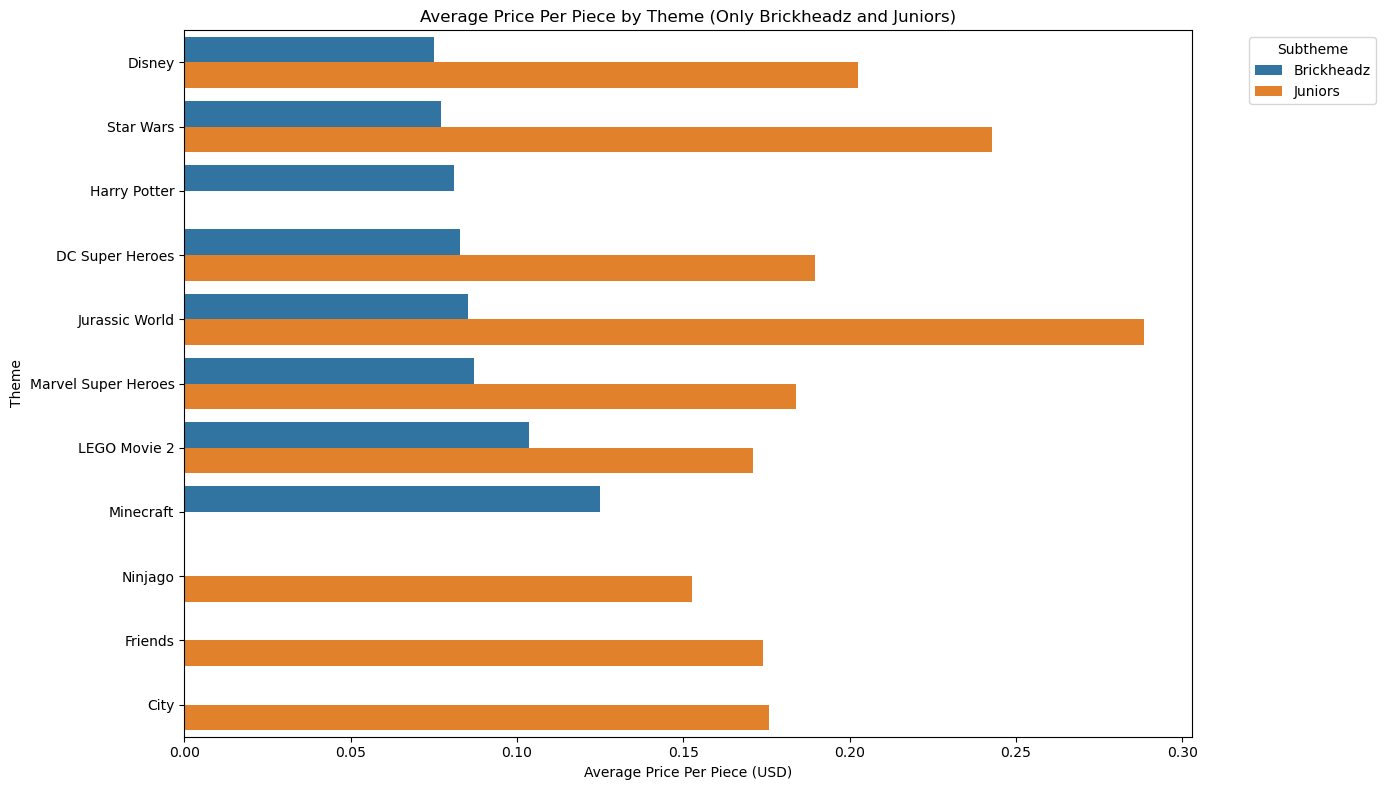

In [79]:
# Visualization: Bar chart for given Themes and Subthemes

import matplotlib.pyplot as plt
import seaborn as sns

# Define the selected themes and subthemes again
selected_themes = [
    'Architecture', 'City', 'Creator', 'Creator Expert', 'DC Super Heroes', 'Disney',
    'Friends', 'Harry Potter', 'Hidden Side', 'Ideas', 'Jurassic World', 'LEGO Movie 2',
    'Marvel Super Heroes', 'Minecraft', 'Ninjago', 'Speed Champions', 'Star Wars', 'Technic'
]
selected_subthemes = ['Brickheadz', 'Juniors']

# Filter the dataset again 
chart_data = theme_subtheme_price_summary[
    (theme_subtheme_price_summary['Theme'].isin(selected_themes)) &
    (theme_subtheme_price_summary['Subtheme'].isin(selected_subthemes))
]

# Create the barplot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=chart_data.sort_values('avg_price_per_piece', ascending=True),
    y='Theme',
    x='avg_price_per_piece',
    hue='Subtheme'
)

plt.title('Average Price Per Piece by Theme (Only Brickheadz and Juniors)')
plt.xlabel('Average Price Per Piece (USD)')
plt.ylabel('Theme')
plt.legend(title='Subtheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Analysis of Bar Chart: Average Price Per Piece by Selected Themes and Subthemes
# The bar chart reveals that Brickheadz sets consistently offer a lower average price per piece 
# compared to Juniors sets across almost all selected themes. 
# Brickheadz sets maintain price efficiency, staying mostly under $0.15 per piece, 
# while Juniors sets often exceed that threshold, sometimes approaching $0.30 per piece.
# This suggests that Brickheadz sets generally provide better value in terms of build content 
# relative to price, making them more attractive for long-term investment.

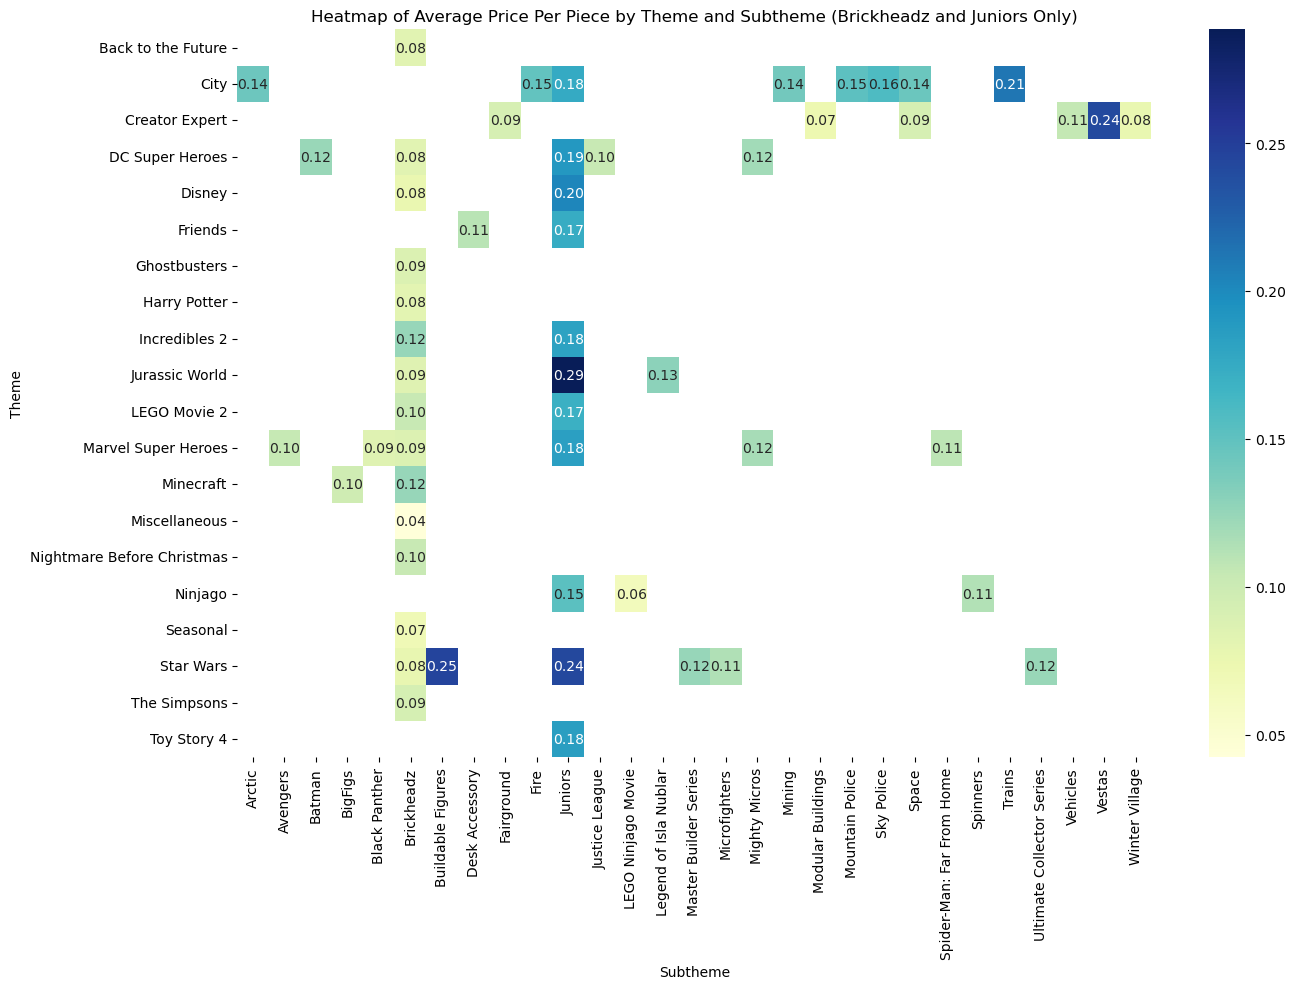

In [89]:
# Heatmap
heatmap_data = theme_subtheme_price_summary.pivot(
    index='Theme', 
    columns='Subtheme', 
    values='avg_price_per_piece'
)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Average Price Per Piece by Theme and Subtheme (Brickheadz and Juniors Only)')
plt.xlabel('Subtheme')
plt.ylabel('Theme')
plt.tight_layout()
plt.show()


In [ ]:
# Analysis of Heatmap: Average Price Per Piece by Theme and Subtheme (Brickheadz and Juniors Only)
# The heatmap clearly shows that Brickheadz sets across most themes maintain a lower average price per piece 
# compared to Juniors sets, which often have higher costs relative to the number of pieces.
# Themes like Star Wars, Harry Potter, and Marvel Super Heroes offer Brickheadz sets with some of the lowest 
# average price per piece values, making them attractive for value-conscious investment.
# On the other hand, Juniors sets, particularly under themes like Jurassic World and Disney, show significantly 
# higher price per piece averages, indicating less value for builders and collectors.

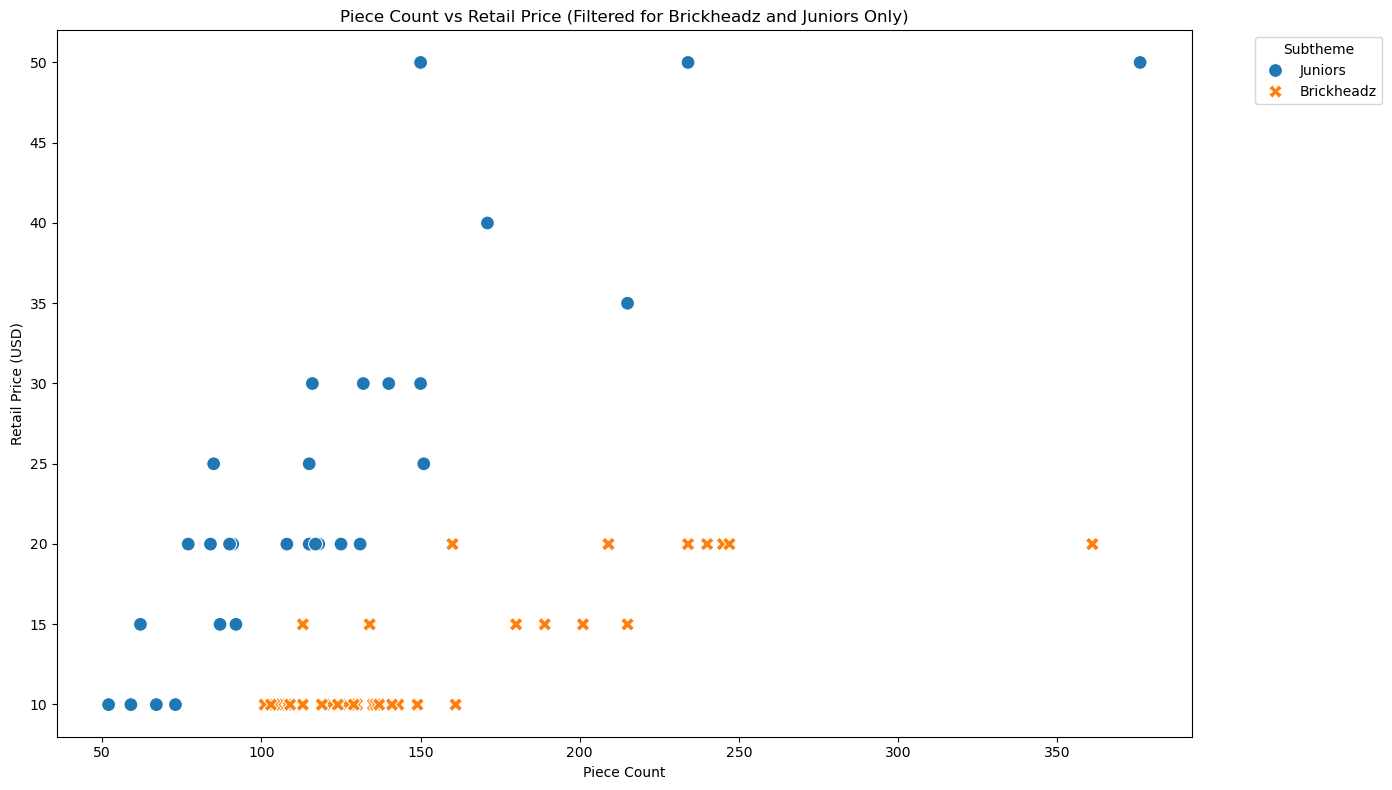

In [93]:
# Better Scatter Plot: Piece Count vs Retail Price for selected Themes and Subthemes only

plt.figure(figsize=(14, 8))

# Further filter lego_data_filtered just for Brickheadz and Juniors
scatter_data = lego_data_filtered[
    (lego_data_filtered['Theme'].isin(selected_themes)) &
    (lego_data_filtered['Subtheme'].isin(selected_subthemes))
]

sns.scatterplot(
    data=scatter_data,
    x='Piece Count',
    y='US Retail Price ($)',
    hue='Subtheme',
    style='Subtheme',  # Only 2 styles: Brickheadz, Juniors
    s=100  # make points bigger for clarity
)

plt.title('Piece Count vs Retail Price (Filtered for Brickheadz and Juniors Only)')
plt.xlabel('Piece Count')
plt.ylabel('Retail Price (USD)')
plt.legend(title='Subtheme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/qb/f68js0hn2fl12phn_8m1j75w0000gn/T/ipykernel_18963/1567421277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


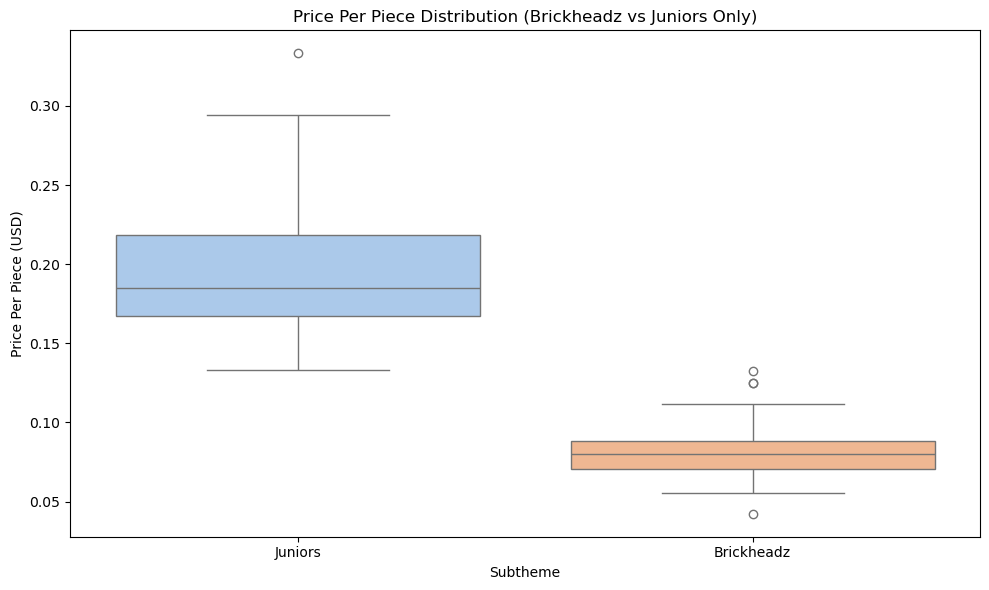

In [99]:
# Box Plot: Distribution of Price Per Piece for Only Brickheadz and Juniors

plt.figure(figsize=(10, 6))

# Further filter again just for safety
subtheme_filtered_data = lego_data_filtered[
    lego_data_filtered['Subtheme'].isin(['Brickheadz', 'Juniors'])
]

sns.boxplot(
    data=subtheme_filtered_data,
    x='Subtheme',
    y='price_per_piece',
    palette='pastel'
)

plt.title('Price Per Piece Distribution (Brickheadz vs Juniors Only)')
plt.xlabel('Subtheme')
plt.ylabel('Price Per Piece (USD)')
plt.tight_layout()
plt.show(

In [101]:
# Analysis of Box Plot: Price Per Piece Distribution (Brickheadz vs Juniors Only)
# This box plot shows a clear comparison of the price per piece distribution between Brickheadz and Juniors sets.
# Brickheadz sets have a much tighter and lower price per piece range, with a lower median and fewer high outliers,
# indicating better consistency and value for buyers.
# In contrast, Juniors sets display a wider spread and a higher median price per piece, with several extreme outliers,
# suggesting less predictable value and higher average costs.

In [105]:
# Find which Theme has the most sets (only in selected Themes and Subthemes)

theme_set_counts = lego_data_filtered.groupby('Theme')['Set #'].count().sort_values(ascending=False)

print("Number of Sets by Theme (Filtered for Brickheadz and Juniors):")
print(theme_set_counts)

# Display the Theme with the most sets
most_sets_theme = theme_set_counts.idxmax()
most_sets_count = theme_set_counts.max()

print(f"\nTheme with the most sets: {most_sets_theme} ({most_sets_count} sets)")


Number of Sets by Theme (Filtered for Brickheadz and Juniors):
Theme
Star Wars                     83
City                          66
Friends                       63
Ninjago                       41
Marvel Super Heroes           33
LEGO Movie 2                  30
Disney                        30
Technic                       28
Creator                       26
DC Super Heroes               25
Harry Potter                  20
Minecraft                     19
Jurassic World                17
Seasonal                      13
Speed Champions               12
Creator Expert                10
Ideas                          9
Architecture                   8
Hidden Side                    8
Toy Story 4                    6
Incredibles 2                  4
Nightmare Before Christmas     1
Miscellaneous                  1
Back to the Future             1
Ghostbusters                   1
The Simpsons                   1
Name: Set #, dtype: int64

Theme with the most sets: Star Wars (83 sets)


In [109]:
# Find the LEGO set with the highest price per piece (Filtered for selected themes and subthemes)
highest_price_per_piece_set = lego_data_filtered.loc[lego_data_filtered['price_per_piece'].idxmax()]

print("Set with the Highest Price Per Piece (Filtered):")
print(highest_price_per_piece_set[['Name', 'Theme', 'Subtheme', 'price_per_piece', 'US Retail Price ($)', 'Piece Count']])


Set with the Highest Price Per Piece (Filtered):
Name                   T. Rex Breakout
Theme                   Jurassic World
Subtheme                       Juniors
price_per_piece               0.333267
US Retail Price ($)              49.99
Piece Count                        150
Name: 23, dtype: object


In [ ]:
# Summary and Investment Recommendation for Michael
# Over the course of this analysis, we explored LEGO sets released in 2018 and 2019, focusing on investment-relevant 
# themes and the subthemes Brickheadz and Juniors. We observed that Brickheadz and Juniors dominated in set counts, 
# but the two subthemes performed very differently when evaluated on value and investment potential.

# Brickheadz consistently demonstrated lower average price per piece across most major themes, such as Star Wars, 
# Marvel Super Heroes, and Disney, offering stronger value for builders and collectors. In contrast, Juniors sets 
# not only had higher price per piece ratios but also greater variability in pricing, making them riskier from an 
# investment standpoint.

# Box plots and scatter plots revealed that Brickheadz sets maintained a tighter, more predictable distribution 
# of pricing and piece counts. Meanwhile, Juniors sets showed a wide spread in prices for relatively modest builds, 
# reducing their appeal for value-conscious investors.

# The heatmap analysis reinforced these findings, showing that Brickheadz sets under high-demand themes like 
# Star Wars and Harry Potter consistently offer the best value opportunities. Even when accounting for variability, 
# Brickheadz sets showed stability and brand-driven demand, both critical for future price appreciation.

# Overall Recommendation:
# Michael should prioritize investing in Brickheadz sets, especially under strong franchises like Star Wars, 
# Marvel Super Heroes, and Harry Potter. These sets combine attractive entry prices, brand loyalty, build value, 
# and a more consistent appreciation potential over time. Juniors sets, while numerous, exhibit less consistent 
# value metrics and should be approached more cautiously for long-term investment purposes.



In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [16]:
# Load the 2019 data
lego_2019 = pd.read_excel("LEGO Analytics Case Data.xlsx", sheet_name="2019 Data")


In [18]:
# Create Box Volume feature
lego_2019['Box Volume'] = lego_2019['Length (in.)'] * lego_2019['Width (in.)'] * lego_2019['Height (in.)']

In [12]:
# Drop missing values in relevant columns
features = ['Piece Count', '# of Minifigures', 'Weight (lb.)', 'Box Volume']
lego_2019_clean = lego_2019.dropna(subset=features + ['US Retail Price ($)'])

In [20]:
# Define feature matrix X and target variable y
X = lego_2019_clean[features]
y = lego_2019_clean['US Retail Price ($)']

In [28]:
#Linear Regression
Split into train (70%) and validation (30%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
train_predictions = linear_model.predict(X_train)
r2t = r2_score(y_train, train_predictions)
maet = mean_absolute_error(y_train, train_predictions)

print(f"Validation R² Score for training: {r2t:.4f}")
print(f"Validation MAE for training: ${maet:.2f}")

#Evaluate model on validation data
val_predictions = linear_model.predict(X_val)
r2v = r2_score(y_val, val_predictions)
maev = mean_absolute_error(y_val, val_predictions)

print(f"Validation R² Score for validation: {r2v:.4f}")
print(f"Validation MAE Score for validation: ${maev:.2f}")


Validation R² Score for training: 0.9182
Validation MAE for training: $7.37
Validation R² Score for validation: 0.9199
Validation MAE Score for validation: $11.80


In [30]:
#Predict price for the full dataset
lego_2019_clean['Predicted Price'] = linear_model.predict(X)

# Calculate R² and MAE on the full dataset
r2_full = r2_score(y, lego_2019_clean['Predicted Price'])
mae_full = mean_absolute_error(y, lego_2019_clean['Predicted Price'])

print(f"Linear Regreesion R² Score (Full Data): {r2_full:.4f}")
print(f"Linear Regression MAE (Full Data): ${mae_full:.2f}")

R² Score (Full Data): 0.9202
MAE (Full Data): $8.71


In [66]:
#Random Forest
rf_features = ['Piece Count', '# of Minifigures', 'Weight (lb.)', 'Box Volume']
X_rf = lego_2019_clean[rf_features]
y_rf = lego_2019_clean['US Retail Price ($)']

#Train-test split (70/30)
X_rf_train, X_rf_val, y_rf_train, y_rf_val = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

#Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf_train, y_rf_train)

#Predict for entire dataset
lego_2019_clean['RF Predicted Price'] = rf_model.predict(X_rf)
lego_2019_clean['RF Value Potential'] = lego_2019_clean['RF Predicted Price'] - lego_2019_clean['US Retail Price ($)']

#Evaluate on full dataset
rf_r2_full = r2_score(y_rf, lego_2019_clean['RF Predicted Price'])
rf_mae_full = mean_absolute_error(y_rf, lego_2019_clean['RF Predicted Price'])

#Show metrics
print(f"Random Forest R² Score (Full Data): {rf_r2_full:.4f}")
print(f"Random Forest MAE (Full Data): ${rf_mae_full:.2f}")

Random Forest R² Score (Full Data): 0.9254
Random Forest MAE (Full Data): $5.33


In [58]:
# Assign price tiers
def assign_price_tier(price):
    if 19.99 <= price <= 29.99:
        return "$19.99–$29.99"
    elif 34.99 <= price <= 69.99:
        return "$34.99–$69.99"
    elif 74.99 <= price <= 99.99:
        return "$74.99–$99.99"
    elif price >= 100.00:
        return "$100.00+"
    else:
        return "Below $19.99"

lego_2019_clean['RF Price Tier'] = lego_2019_clean['US Retail Price ($)'].apply(assign_price_tier)

In [62]:
# Group and extract top/bottom 2 sets by value potential
group_keys = ['Theme', 'Subtheme', 'RF Price Tier']
rf_grouped_results = []

for _, group in lego_2019_clean.groupby(group_keys):
    top_2 = group.nlargest(2, 'RF Value Potential')
    bottom_2 = group.nsmallest(2, 'RF Value Potential')
    rf_grouped_results.extend([top_2, bottom_2])

In [64]:
# Combine into final DataFrame
rf_top_bottom_df = pd.concat(rf_grouped_results)[[
    'Name', 'Theme', 'Subtheme', 'RF Price Tier',
    'US Retail Price ($)', 'RF Predicted Price', 'RF Value Potential'
]].sort_values(by=['Theme', 'Subtheme', 'RF Price Tier', 'RF Value Potential'], ascending=[True, True, True, False])

rf_top_bottom_df.reset_index(drop=True, inplace=True)

# View top rows
rf_top_bottom_df.head(10)

,Name,Theme,Subtheme,RF Price Tier,US Retail Price ($),RF Predicted Price,RF Value Potential
0,Dock Side Fire,City,Fire,$19.99–$29.99,19.99,19.72,-0.27
1,Dock Side Fire,City,Fire,$19.99–$29.99,19.99,19.72,-0.27
2,Fire Chief Response Truck,City,Fire,$19.99–$29.99,29.99,29.34,-0.65
3,Fire Chief Response Truck,City,Fire,$19.99–$29.99,29.99,29.34,-0.65
4,Burger Bar Fire Rescue,City,Fire,$34.99–$69.99,39.99,42.44,2.45
5,Fire Plane,City,Fire,$34.99–$69.99,59.99,57.89,-2.10
6,Fire Plane,City,Fire,$34.99–$69.99,59.99,57.89,-2.10
7,Fire Station,City,Fire,$34.99–$69.99,69.99,61.29,-8.70
8,Downtown Fire Brigade,City,Fire,$74.99–$99.99,99.99,103.09,3.10
9,Downtown Fire Brigade,City,Fire,$74.99–$99.99,99.99,103.09,3.10


In [68]:
# Filter only for Brickheadz and Juniors
rf_filtered_subthemes = lego_2019_clean[lego_2019_clean['Subtheme'].isin(['Brickheadz', 'Juniors'])]

# Group by Theme, Subtheme, and RF Price Tier
group_keys = ['Theme', 'Subtheme', 'RF Price Tier']
rf_grouped_results = []

for _, group in rf_filtered_subthemes.groupby(group_keys):
    top_2 = group.nlargest(2, 'RF Value Potential')
    bottom_2 = group.nsmallest(2, 'RF Value Potential')
    rf_grouped_results.extend([top_2, bottom_2])

# Combine top and bottom performers
rf_top_bottom_df = pd.concat(rf_grouped_results)[[
    'Name', 'Theme', 'Subtheme', 'RF Price Tier',
    'US Retail Price ($)', 'RF Predicted Price', 'RF Value Potential'
]].sort_values(by=['Theme', 'Subtheme', 'RF Price Tier', 'RF Value Potential'], ascending=[True, True, True, False])

rf_top_bottom_df.reset_index(drop=True, inplace=True)

# Display top of result
rf_top_bottom_df.head(10)


,Name,Theme,Subtheme,RF Price Tier,US Retail Price ($),RF Predicted Price,RF Value Potential
0,Garbage Truck,City,Juniors,$19.99–$29.99,19.99,20.54,0.55
1,Garbage Truck,City,Juniors,$19.99–$29.99,19.99,20.54,0.55
2,Garage Centre,City,Juniors,$34.99–$69.99,49.99,47.49,-2.50
3,Garage Centre,City,Juniors,$34.99–$69.99,49.99,47.49,-2.50
4,Batman and the Joker Escape,DC Super Heroes,Juniors,$34.99–$69.99,39.99,38.04,-1.95
5,Batman and the Joker Escape,DC Super Heroes,Juniors,$34.99–$69.99,39.99,38.04,-1.95
6,Batman vs The Riddler Robbery,DC Super Heroes,Juniors,Below $19.99,9.99,11.04,1.05
7,Batman vs The Riddler Robbery,DC Super Heroes,Juniors,Below $19.99,9.99,11.04,1.05
8,Anna's Canoe Expedition,Disney,Juniors,$19.99–$29.99,19.99,20.64,0.65
9,Cinderella's Carriage Ride,Disney,Juniors,$19.99–$29.99,19.99,18.97,-1.02
